## Ceneo analyzer

## Imports

In [17]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## List all codes of products for which opinions have been collected 

In [24]:
if os.path.exists("opinions"):
    print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

64418827
40279876


## Enter code of product about which opinions are to be analyzed

In [25]:

product_id = input("enter product code: ")

## Reading opinions from JSON file to pandas.DataFrame

In [26]:
opinions = pd.read_json(f"opinions/{product_id}.json")
max_score = 5
opinions.score = opinions.score.apply(lambda s: round((s*max_score), 1))


## Basic statistics 

In [27]:

opinion_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum() 
average_scorer = (opinions.score.mean()*max_score).round(2)



## Basic charts 

## Opinions score histogram

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '10'),
 Text(0, 0, '28')]

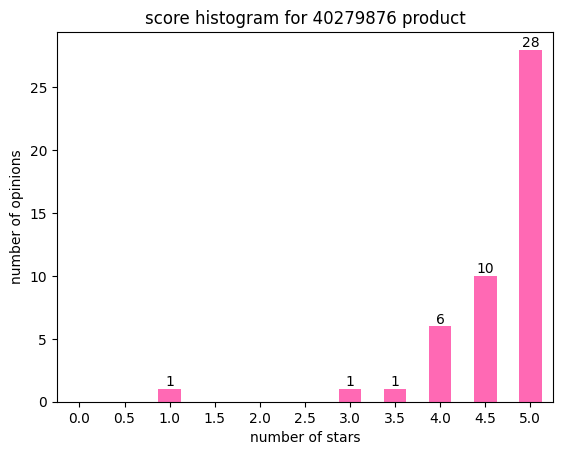

In [28]:
score_distribution = opinions.score.value_counts().sort_index().reindex(np.arange(0,5.5,0.5))
fig, ax = plt.subplots()
score_distribution.plot.bar(color = "hotpink")
plt.xlabel("number of stars")
plt.ylabel("number of opinions")
plt.title(f"score histogram for {product_id} product")
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], label_type="edge", fmt = lambda l: int(l) if l else "")

## Recommendations shares


Text(0.5, 1.0, 'srecomendation shares for 40279876 product')

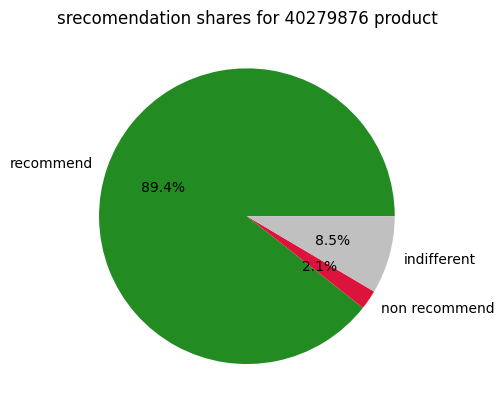

In [43]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex([True, False, np.nan], fill_value = 0)
recommendation_distribution.plot.pie(
    labels = ["recommend", "non recommend", "indifferent"],
    label = "",
    colors = ["forestgreen", "crimson", "silver"],
    autopct = lambda l: "{:1.1f}%".format(l) if l else ""
)
plt.title(f"srecomendation shares for {product_id} product")

In [ ]:
opinions